In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
data.shape

(150, 5)

In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
dummy = pd.get_dummies(data)
dummy

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
model = scaler.fit(dummy)

In [9]:
scaled_data = model.transform(dummy)

In [10]:
scaled_data1=pd.DataFrame(scaled_data)
scaled_data1.describe()

,0,1,2,3,4,5,6
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778,0.333333,0.333333,0.333333
std,0.230018,0.180664,0.299054,0.317984,0.472984,0.472984,0.472984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000,0.000000,0.000000
50%,0.416667,0.416667,0.567797,0.500000,0.000000,0.000000,0.000000
75%,0.583333,0.541667,0.694915,0.708333,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
x=data.drop('species',axis=1)
y=data.species

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [14]:
model.fit(x_train,y_train)

C:\Users\senth\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
model.predict(x_test)

array(['versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

In [16]:
predicted_y = model.predict(x_test)

In [17]:
model.score(x_test,y_test)

0.9666666666666667

# KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier(n_neighbors = 8)

In [20]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [22]:
pred_y = model.predict(x_test)

In [23]:
model.score(x_test,y_test)

1.0

In [24]:
score = []
for i in range(1,100):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    predicted_y = model.predict(x_test)
    score.append(model.score(x_test,y_test))
print(score)

[0.9, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 0.8666666666666667, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8666666666666667, 0.9, 0.9, 0.9, 0.9, 0.9333333333333333, 0.6333333333333333, 0.6, 0.6333333333333333, 0.633333333333

Text(0, 0.5, 'Mean Error')

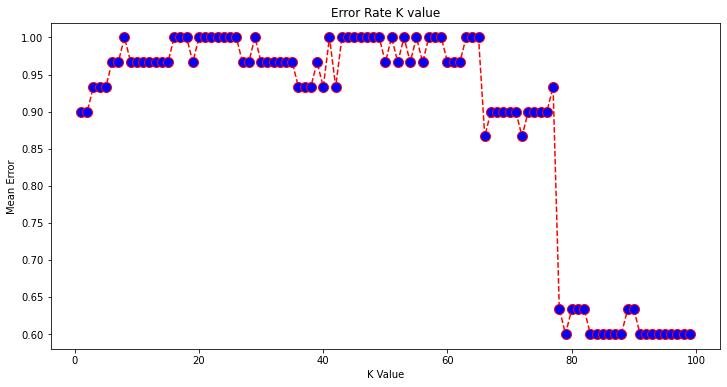

In [25]:
plt.figure(figsize=(12,6))
plt.plot(range(1,100),score,color = 'red',linestyle = 'dashed', marker = 'o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# SVC

In [26]:
from sklearn.svm import SVC

In [27]:
svc_model = SVC(kernel = "linear")

In [28]:
svc_model.fit(x_train,y_train)

SVC(kernel='linear')

In [29]:
predicted_y = model.predict(x_test)

In [30]:
svc_model.score(x_test,y_test)

0.9333333333333333